# Turorial Notebook: BIAS DETECTION & MITIGATION

## GRAD-E1394 Deep Learning -- Assignment 3
Authors:
*   Jorge Roa, 226454@students.hertie-school.org
*   Carlo Greß, 216319@students.hertie-school.org
*   Hannah Schweren, 216579@students.hertie-school.org



This notebook provides our code and explanations to enable users to detect & mitigate bias, using the example of the COMPAS Recidivism Risk Score Data and Analysis Dataset. Users will be equiped with concrete strategies to first detect, and secondly mitigate bias. Following this tutorial is a first step to become awareness of biases in Algorithms and promote ethical AI - especially in the intersection with policy decisions.



# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Part 1: Data Exploration and Bias Detection](#Part1)
  *   [Data Download](#1datadownload)
  *   [Exploratory Data Visualization
](#visualization)
  *   [Introducing the Aequitas-Library](#aequitas)

*   [Part 2: Neural Network Classifier for Fair Data Distribution](#Part2)
*   [Part 3: Mitigating bias](#Part3)
  *   [Data Download](#1datadownload)
  *   [Data Preprocessing](#preprocessing)
  *   [Preprocessing Mitigation Strategies](#preprocessingmitigation)
  *   [Post-processing Mitigation Strategy](#postprocessing)




*   [Methodology](#methodology)
*   [Results & Discussion](#results&discussion)
*   [References](#references)


<a name="memo"></a>
# Memo

Bias and fairness are two crucial yet often neglected aspects of applying deep learning models to the public policy domain. Many researchers and policy makers predominantly focus on model performance metrics, disregarding the importance of fairness. Biases can occur at any stage of the model building pipeline. For this tutorial, two stages are especially important:

* **Data bias**: If the data used to train a deep learning model is already biased, the result will be biased as well. Prominant examples for data biases include:
  * *Historical bias*, where long-term, real-world biases are present in the data
  * *Representation bias*, where the chosen sample is not representative for the underlying population, e.g. when marginalised groups are underrepresented

* **Model bias**: If our data is well-sampled and unbiased, but the model has substantial flaws, results and the subsequent interpretation might lead to unfair results:
  * *Aggregation bias* is present when the same model is used in order to draw conclusions for different populations that are not equally represented by the model

Although these examples are not exhaustive, they already illustrate that policy makers need to cautiously consider a multitude of error sources in order to implement unbiased and fair models.

Previous research has discovered that numerous governments have used biased ML models that systematically discriminated marginalised groups (e.g. Smith 2020, showing that the UK government used flawed alorithms for calculating students' grades and Obermeyer et al. 2019, showing that the U.S. health care systems discriminated black patients).

This tutorial uses a data set that has been used to calculate US defendants' recidivism risk scores and previously produced unfair predicitons that discriminated black defendants.



<a name="overview"></a>
# Overview

This tutorial serves as a practical guide for our final project, allowing users to familiarize themselves with different tools available to detect and mitigate bias. Our presentation provided a theoretical introduction, and now we will delve into hands-on exercises using the COMPAS dataset to explore various practical strategies concernign bias.

Our tutorial is divided into three parts:

1. Introduction to Bias Detection Metrics:
We will introduce different metrics to detect bias, providing a smooth introduction to the topic and helping users gain a better understanding of the issue.

2. Replication of Biased Output with a Feed Forward Neural Network:
In this step, we will replicate the biased output using a Feed Forward Neural Network. This hands-on exercise will provide users with practical experience in generating predictions and raise awarness for the biased output.

3. Mitigation of Detected Bias:
The grand finale and most important part of our tutorial! Users will learn effective strategies to mitigate the detected bias. This step is crucial for ethical deep learning, and the tutorial aims to equip users with essential skills dealing with biased results.

By completing this tutorial, users will acquire valuable skills for future data endeavors. It serves as a foundational step to train users and raise awareness of fairness issues in Deep Learning.


<a name="background-and-prereqs"></a>
# Background & Prerequisites


Before diving into our tutorial on bias & fairness, users should have a foundational understanding of key concepts in machine learning and neural networks. Familiarity with Python is essential. Additionally, a grasp of linear algebra and calculus will be beneficial for understanding the mathematical underpinnings of deep learning algorithms.

A solid understanding of model training is crucial, as well as knowledge of common machine learning libraries such as Keras and scikit-learn. Users should also be aware of the ethical and policy considerations surrounding machine learning applications, particularly in relation to bias and fairness - that were presented in our final project presentation. The slides can be accessed [here](https://github.com/jurjoroa/DeepLearning_bias_NLP/blob/JorgeRoa/DL_bias_presentation.pdf)

Lastly, a conceptual understanding of how neural networks operate, including layers, activation functions, and backpropagation, will  enhance the learning experience of the user. Overall, a basic background in machine learning fundamentals will help users to engage more effectively with our tutorial.

## Videos

### Bias in AI

to indtroduce the topic, we recommend watching these short video!

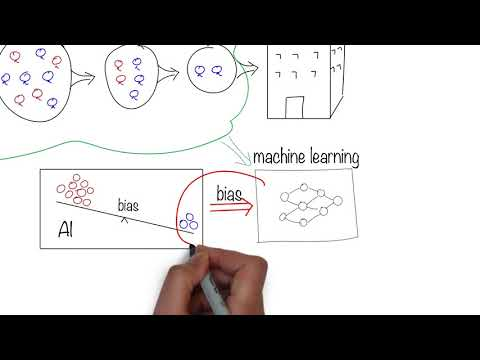

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('BtgcuhQ0cks')

## Disparate Impact Explained

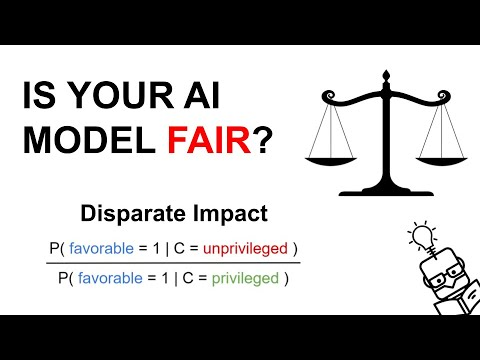

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Gg7ca3knTBw')

## Reading materials

We based our tutorial on different readings and can recommend checking out the following ones, to get a deeper understanding of our tutorial's topics and approaches.

* Regean, Mary. 2021. "Understanding bias and fairness in AI system". https://towardsdatascience.com/understanding-bias-and-fairness-in-aisystems-
6f7fbfe267f3
* Anaconda, 2021 State of Data Science Report. https://know.anaconda.com/rs/387-XNW-688/images/Anaconda-2021-SODS-Report-Final.pdf
* Clark, Andrew. September 19, 2022. "Top bias metrics and how they work". Monitaur. https://www.monitaur.ai/blog-posts/top-bias-metricsand-
how-they-work
* Feldman et al. „Certifying and Removing Disparate Impact“. Proceedings of the 21th ACM SIGKDD International Conference on Knowledge
Discovery and Data Mining, ACM, 2015, S. 259–68. DOI.org (Crossref), https://doi.org/10.1145/2783258.2783311.
+ towards datascience, "AI Fairness — Explanation of Disparate Impact Remover". https://towardsdatascience.com/ai-fairness-explanation-of-disparate-impact-remover-ce0da59451f1
* Lee, Nicol Turner, Paul Resnick, and Genie Barton. "Algorithmic bias detection and mitigation: Best practices and policies to reduce consumer harms." Brookings Institute: Washington, DC, USA 2 (2019)



<a name="software-requirements"></a>
# Software Requirements


This notebook requires Python >= 3.7. The following libraries are required:
*   pandas
*   numpy
*   matplotlib
*   tensorflow
*   Aequitas (https://dssg.github.io/aequitas/30_seconds_aequitas.html)
*   keras_tuner (https://keras.io/keras_tuner/)
*   aif360 (https://aif360.readthedocs.io/en/stable/)
*   BlackBoxAuditing (https://github.com/algofairness/BlackBoxAuditing)


In [ ]:
!pip install pandas numpy matplotlib
!pip install Aequitas
!pip install keras_tuner
!pip install aif360
!pip install BlackBoxAuditing
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00
  Created wheel for Flask

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True, context="talk")
from IPython import display

# Data manipulation
import pandas as pd
import numpy as np
from tqdm import tqdm

# Aequitas library used to audit models for discrimination and bias
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

# Machine and deep learning libraries
import tensorflow as tf
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
import keras_tuner as kt
from keras import Input, Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# AI fairness library
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import StandardDataset as Dataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.postprocessing.reject_option_classification import RejectOptionClassification

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


<a name="data-description"></a>
# Data Description

In this tutorial we are working with the COMPAS Recidivism Risk Score Data and Analysis (Source: Pro Publica, https://www.propublica.org/datastore/dataset/compas-recidivism-risk-score-data-and-analysis) This dataset is a classical example for bias in machine learning. We specifically liked using this dataset as an example because it reveils the possible harmfull negative impact on real world decisions, that algorithms can have and the resulting policy responsibility.

The tabular dataset is used in U.S. court proceedings to evaluate the probability of a defendant reoffending. It is available in csv format for free and contains the following information (Source: https://mlr3fairness.mlr-org.com/reference/compas.html#pre-processing) :

* (integer) age : The age of defendants.

* (factor) c_charge_degree : The charge degree of defendants. F: Felony M: Misdemeanor

* (factor) race: The race of defendants.

* (factor) age_cat: The age category of defendants.

* (factor) score_text: The score category of defendants.

* (factor) sex: The sex of defendants.

* (integer) priors_count: The prior criminal records of defendants.

* (integer) days_b_screening_arrest: The count of days between screening date and (original) arrest date. If they are too far apart, that may indicate an error. If the value is negative, that indicate the screening date happened before the arrest date.

* (integer) decile_score: Indicate the risk of recidivism (Min=1, Max=10)

* (integer) is_recid: Binary variable indicate whether defendant is rearrested at any time.

* (factor) two_year_recid: Binary variable indicate whether defendant is rearrested at within two years.

* (numeric) length_of_stay: The count of days stay in jail.

In the course of the tutorial, we'll also work with a version of the COMPAS data, that was processed to work well with the aequitas package - this version of the dataset can be found in this Github repository: https://github.com/dssg/aequitas/tree/master/examples/data. Here, only a subset of the variables is considered, but it includes all important variables for demonstrating the package's benefits. It includes:

* (integer) entity_id: ID variable

* (integer) score: Risk score of defendants, binary

* (factor) label_value: Binary variable indicate whether defendant is rearrested

* (factor) race: The race of defendants.

* (factor) sex: The sex of defendants

* (factor) age_cat: The age category of defendants


<a name="Part1"></a>
# Part 1: Data Exploration and Bias Detection



**Note that the first part of this tutorial is largely based on the documentation of the aequitas-library (https://dssg.github.io/aequitas/examples/compas_demo.html?highlight=xtab). Since the COMPAS data is a widely-known and commonly used data set for showing issues with biased data, the authors used it for demonstrating the library's core functions. Instead of linking the documentation, we decided to include the most important features of the library in the first part of our tutorial, partially adapting some code. More, we adjusted some codes in order to show the metrics that were most important to us for demonstrating bias in the compas data.**

For a first overview of the data, we load it directly from GitHub. Note that we use a version of the Compas data here that is explicitly well-suited for the Aequitas library, with a restricted number of columns and slightly deviating variable names. From printing the first 5 rows, we can retrieve that an ID variable, a (binary) risk score, a (binary) recidivism indicator, and three demographic variables (race, sex, age) are included.

<a name="1datadownload"></a>
## 1.1 Data Download



In [ ]:
df_compas_aeq = pd.read_csv("https://raw.githubusercontent.com/dssg/aequitas/master/examples/data/compas_for_aequitas.csv")
df_compas_aeq.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


<a name="visualization"></a>

## Exploratory Data Visualization

### Distribution of Defendants by Demographics (Race, Age, Sex) and Risk Scores

As a first step, we are exploring the distribution of our defendant data with regards to demographic characteristics and the calculated risk scores. As we can see, African-Americans, Caucasians, males, and defendants aged 25-45 are the subgroups that are highly represented in the data. Additionally, we can already see from the plots that African-Americans and defendants aged under 25 are the only subgroups where the majority has been assigned a high risk score.

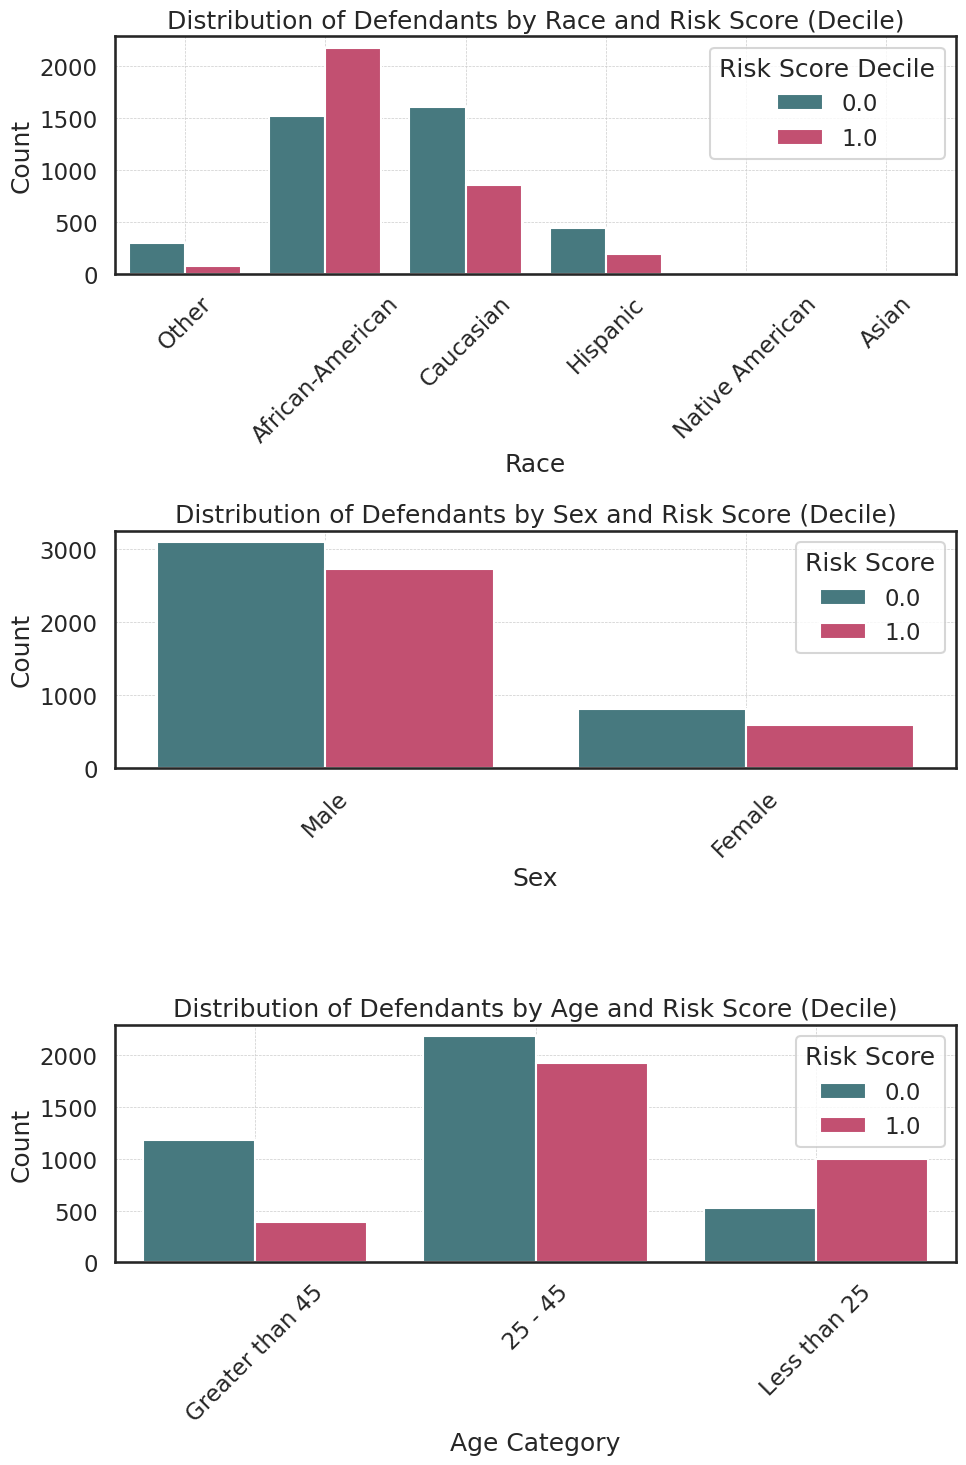

In [ ]:

Reds_palette = sns.diverging_palette(204, 0, n=2)

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# race
by_race = sns.countplot(
    ax=axes[0],
    x="race",
    hue="score",
    data=df_compas_aeq,
    palette=Reds_palette
)

axes[0].set_title("Distribution of Defendants by Race and Risk Score (Decile)")
axes[0].set_xlabel("Race")
axes[0].set_ylabel("Count")
axes[0].legend(loc='upper right', title='Risk Score Decile')
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].tick_params(axis='x', rotation=45)

# sex
by_sex = sns.countplot(
    ax=axes[1],
    x="sex",
    hue="score",
    data=df_compas_aeq,
    palette=Reds_palette
)

# Add title and labels
axes[1].set_title("Distribution of Defendants by Sex and Risk Score (Decile)")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")

# sex
axes[1].legend(loc='upper right', title='Risk Score')
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[1].tick_params(axis='x', rotation=45)

# Create countplot for age
by_age = sns.countplot(
    ax=axes[2],
    x="age_cat",
    hue="score",
    data=df_compas_aeq,
    palette=Reds_palette
)

axes[2].set_title("Distribution of Defendants by Age and Risk Score (Decile)")
axes[2].set_xlabel("Age Category")
axes[2].set_ylabel("Count")

axes[2].legend(loc='upper right', title='Risk Score')

axes[2].grid(True, linestyle='--', linewidth=0.5)

axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


### Distribution of Defendants by Demographics and Recidivism

Next, we are looking at the same demographic subgroups and whether the defendants actually committed crime again. We can already see, that there seems to be a mismatch between the assigned risk scores and the recidivism patterns.

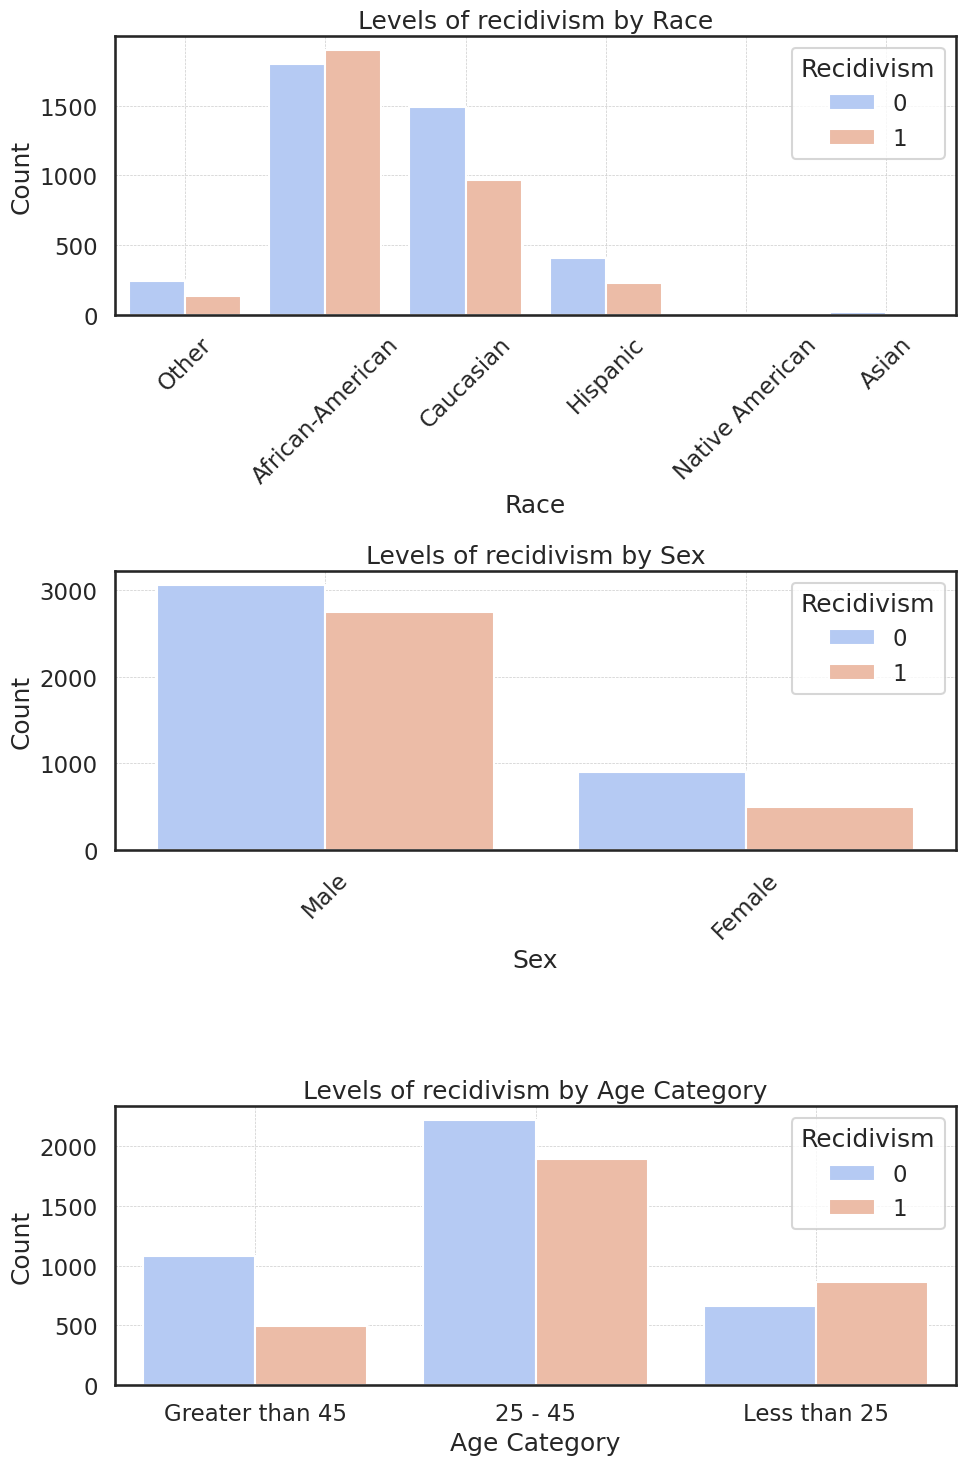

In [ ]:
coolwarm_two_colors = sns.color_palette("coolwarm", n_colors=2)
coolwarm_palette = sns.color_palette("coolwarm", as_cmap=True)


# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Create countplot for race
label_by_race = sns.countplot(
    ax=axes[0],
    x="race",
    hue="label_value",
    data=df_compas_aeq,
    palette=coolwarm_two_colors
)

# Add title and labels for race
axes[0].set_title("Levels of recidivism by Race")
axes[0].set_xlabel("Race")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].legend(loc='upper right', title='Recidivism')
axes[0].tick_params(axis='x', rotation=45)

# Create countplot for sex
label_by_sex = sns.countplot(
    ax=axes[1],
    x="sex",
    hue="label_value",
    data=df_compas_aeq,
    palette=coolwarm_two_colors
)

# Add title and labels for sex
axes[1].set_title("Levels of recidivism by Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[1].legend(loc='upper right', title='Recidivism')
axes[1].tick_params(axis='x', rotation=45)

# Create countplot for age category
label_by_age = sns.countplot(
    ax=axes[2],
    x="age_cat",
    hue="label_value",
    data=df_compas_aeq,
    palette=coolwarm_two_colors
)

# Add title and labels for age category
axes[2].set_title("Levels of recidivism by Age Category")
axes[2].set_xlabel("Age Category")
axes[2].set_ylabel("Count")
axes[2].grid(True, linestyle='--', linewidth=0.5)
axes[2].legend(loc='upper right', title='Recidivism')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

<a name="aequitas"></a>

## Introducing the Aequitas-Library

After eyeballing our data set and noticing that there might be some fairness issues, we can now use the Aequitas library to calculate common metrics that indicate biases in subgroups. More specifically, we are using the library's Group() class that evaluates biases across all demographic subgroups in the dataset. Note here that the library requires the input data to have columns named "score" and "label_value". These columns are by default used to calculate the bias metrics.

In order to use Aequitas for your purposes, you should rename the columns that you want to check for potential biases to "score" and "label_value". Additionally, at least one column needs to include grouping information (in our example, several demographic variables). ID variables as entity_id are by default not treated as grouping variables.

The following code chunk calculates these metrices for all demographic subgroups using the get_crosstabs function, based on the risk score and the label_value, which indicates the recidivism.

In [ ]:
g = Group()
xtab, _ = g.get_crosstabs(df_compas_aeq)
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,...,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,...,0.250000,2,3,21,6,9,23,32,7214,0.281250
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,...,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,...,0.298273,87,129,318,103,232,405,637,7214,0.364207
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,...,0.666667,3,1,5,9,10,8,18,7214,0.555556
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,...,0.209549,36,90,208,43,133,244,377,7214,0.352785
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,...,0.423656,288,195,609,303,498,897,1395,7214,0.356989
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,...,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,...,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,...,0.250000,181,285,897,213,498,1078,1576,7214,0.315990


Additionally, we can use list_absolute_metrics() for an improved overview grouped by the demographics and with rounded values for the metrics.

In [ ]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


Next, we can use the information on the metrics that have been calculated by the previous chunk to plot the present biases. For that purpose, the `Plot()` class is used and stored in a variable. Afterwards, this variable can be used to plot the metrics of interest. The next code chunk exemplarily plots the **false positive rate** for all subgroups. In the context of our data, false positive cases are present when defendants are classified high risk although they did not recidivate. As we can see from the plot below, these cases are especially present amoung younger as well as among African- and Native Americans.

Additionally, the colors by default indicate how many respondents are included in the respective subgroup. The exact number can also be retrieved from the bar labels. Referring to the group sizes, you can see that the two races with they highest FPR are of significantly different size: While there are only 18 Native Americans included in our data, a total of nearly 3,700 African-American defendants are present.  

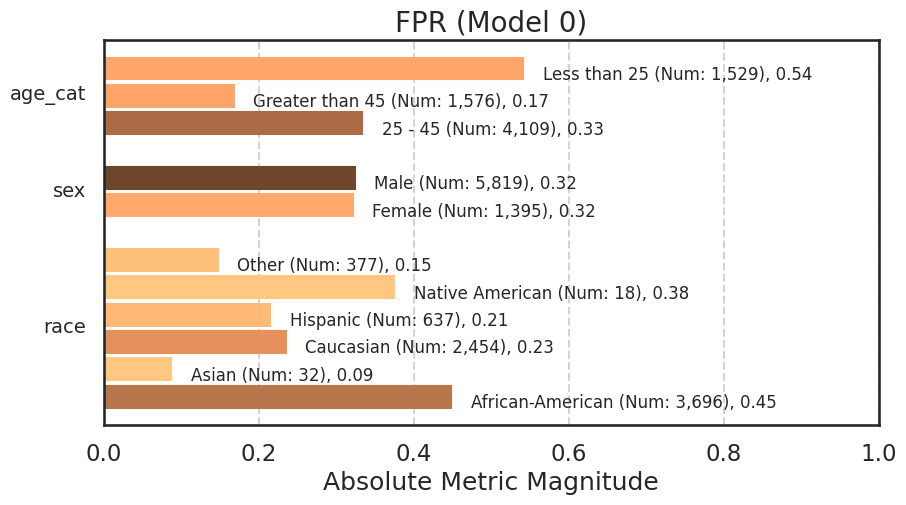

In [ ]:
aqp = Plot()
fpr = aqp.plot_group_metric(xtab, 'fpr')

For better readability, and when only interested in the rates rather then the absolute numbers, we can switch the axes and rotate the x-axis labels:

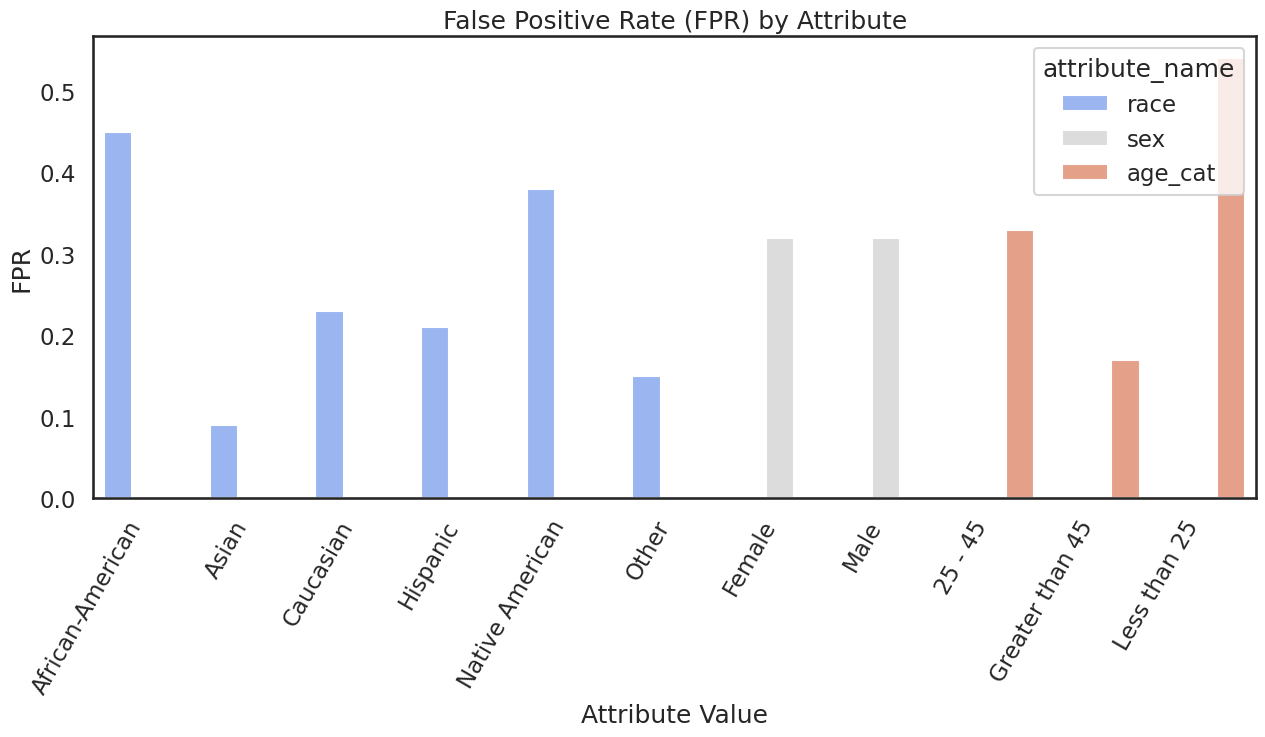

In [ ]:
xtab_df = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2).set_index(['attribute_name', 'attribute_value'])
xtab_df = xtab_df.reset_index()

# Create a figure for the plot
plt.figure(figsize=(15, 6))

# Create a bar plot for FPR
ax = sns.barplot(x='attribute_value', y='fpr', hue='attribute_name', data=xtab_df, palette='coolwarm', dodge=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')


# Add title and labels
plt.title('False Positive Rate (FPR) by Attribute')
plt.xlabel('Attribute Value')
plt.ylabel('FPR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

Besides the FPR, the Aequitas package calculated several further helpful metrices that illustrate biases. In the following code chunk, we present four metrices in total:

* The Predicted Positive Rate (PPR): Proportion of positively predicted defendants

* Predictive Prevalence (PPrev): Positive predicition at higher prevalence in relation to group size

* False Negative Rate: Negative risk predictions, positive score

* False Positive Rate: Positive risk predicition, negative score

We can see that African-Americans and males are largely predicted as having a high-risk score (PPR), which also holds true when considering group size (PPrev), although here, also younger defendants are highly represented. We already discussed FPR, showing that African-Americans are often misclassified as high risk. Looking at the FNR, we can see that African-Americans rather rarely are misclassified as low-risk, while this seems to be especially true with older defendants.

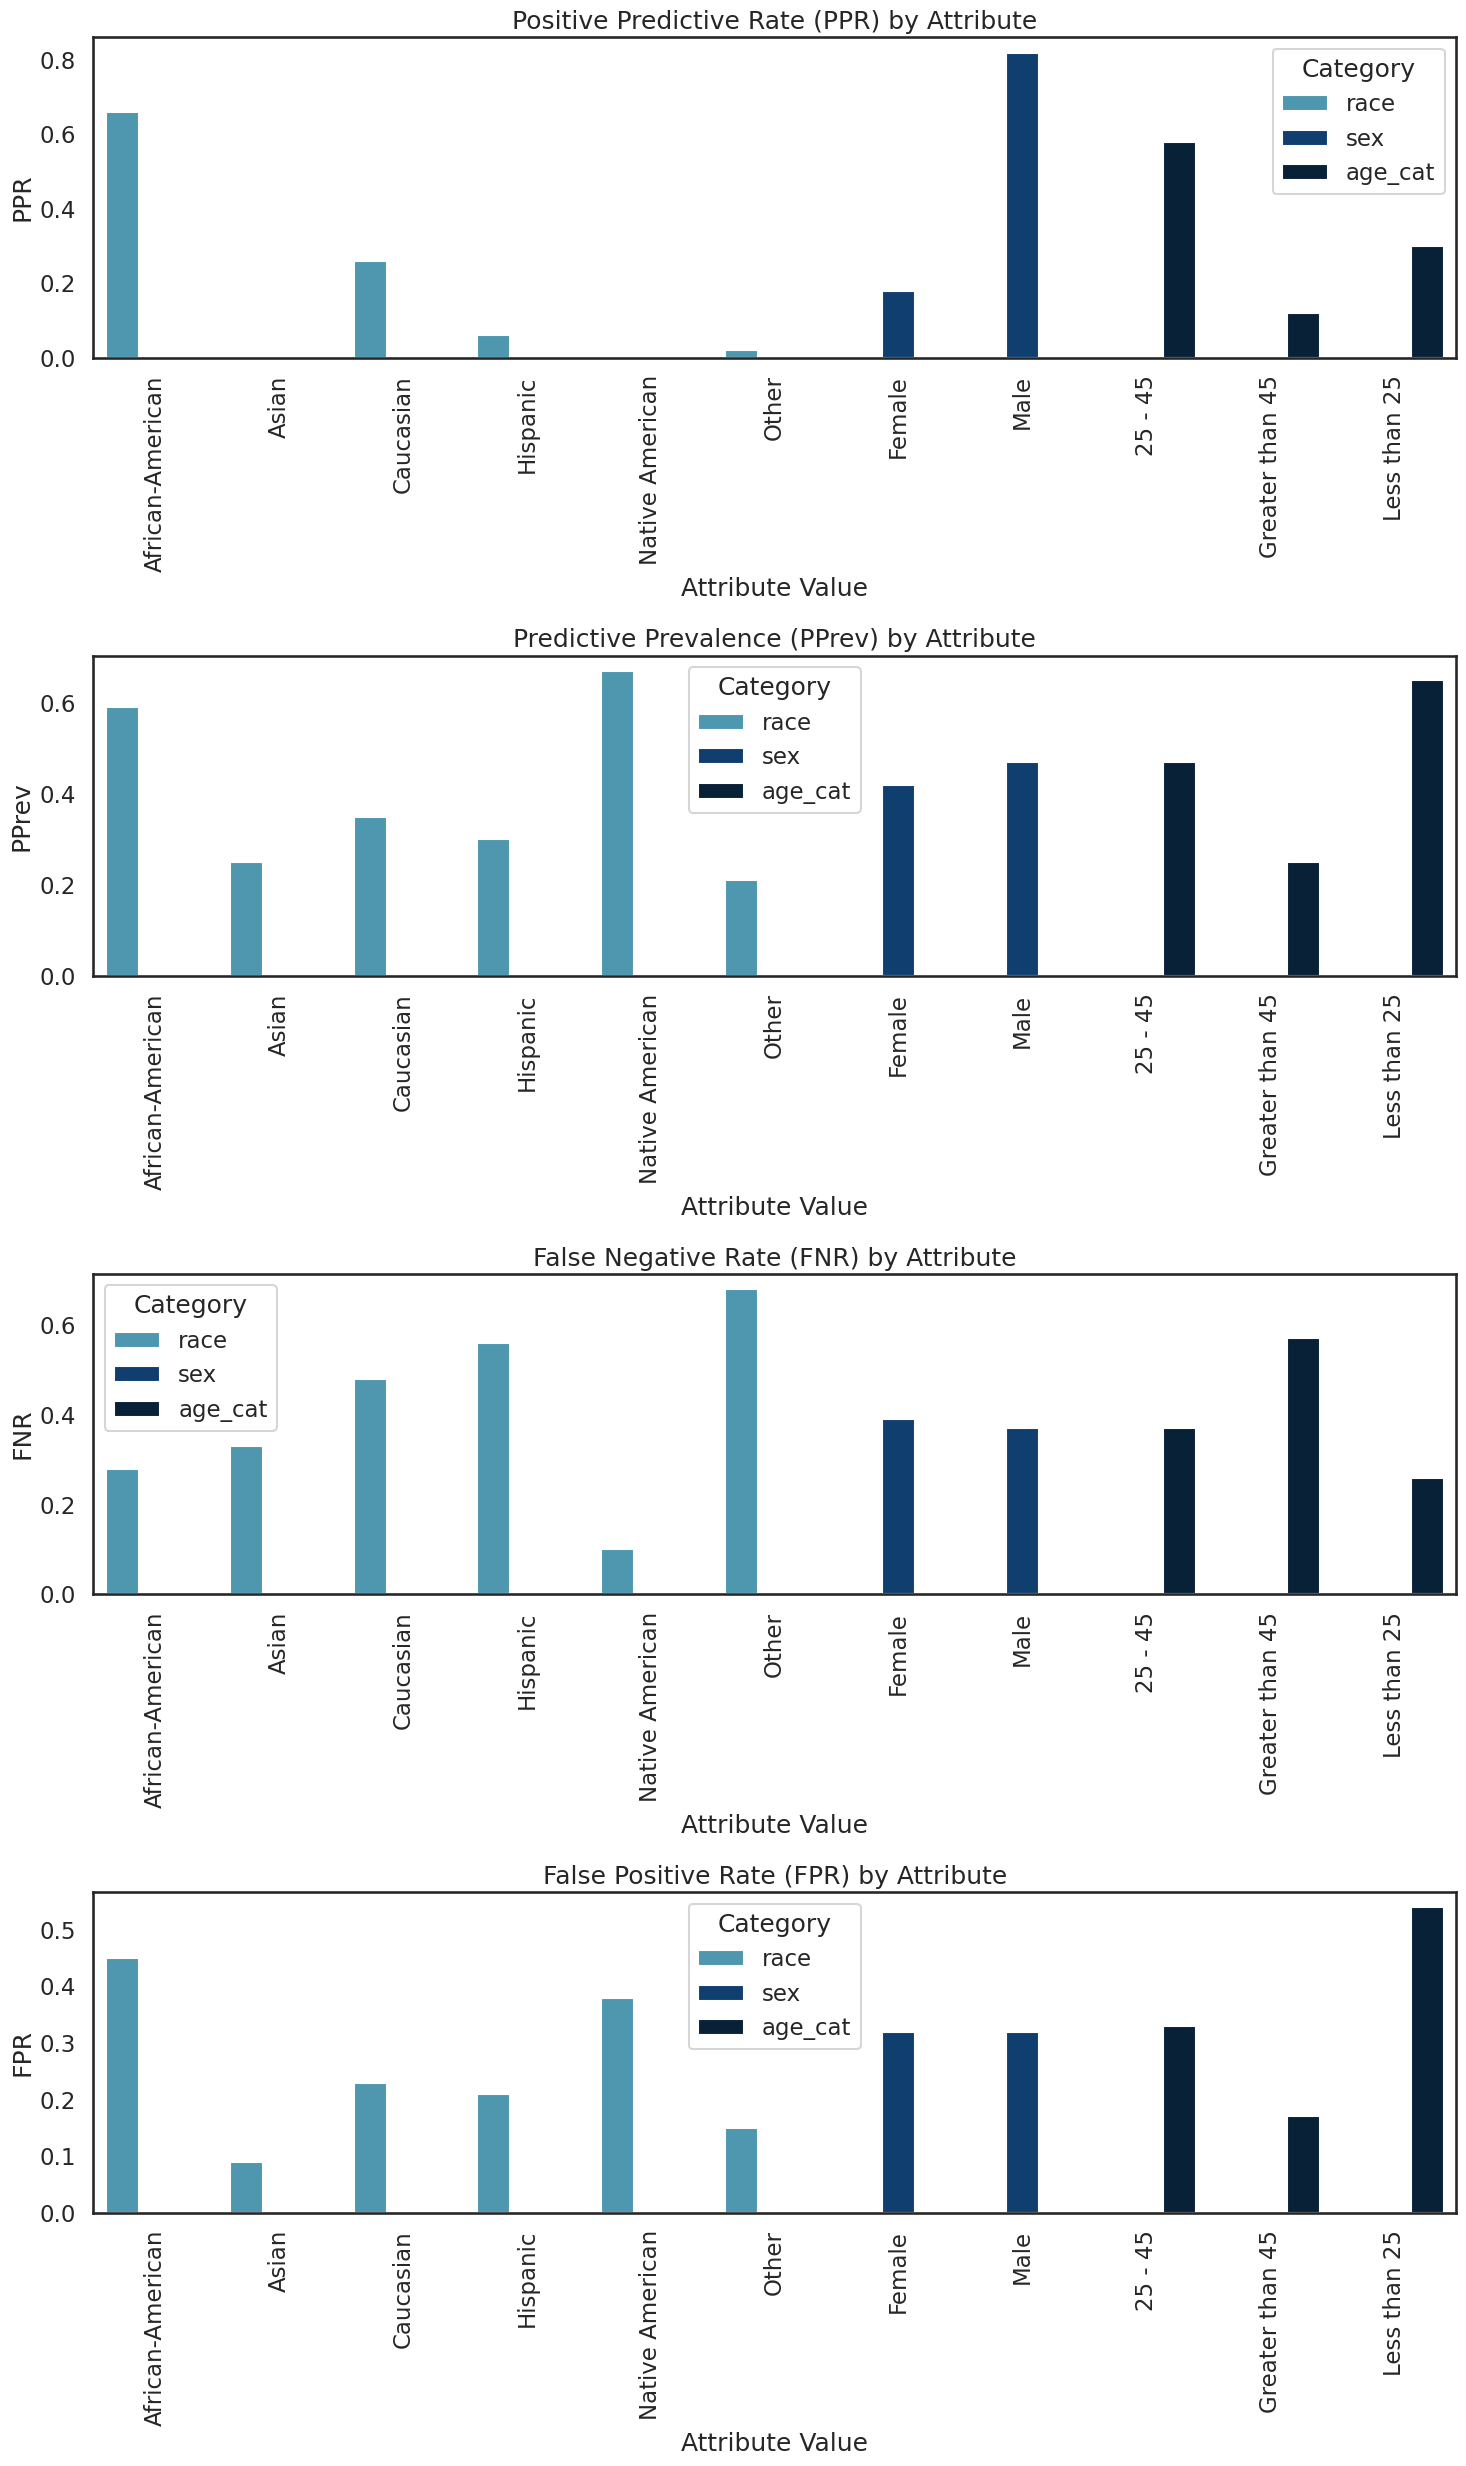

In [ ]:
# Plot
fig, axes = plt.subplots(4, 1, figsize=(15, 25))  # 4 rows, 1 column
palette = sns.color_palette("ocean_r", n_colors=3)

# PPR Plot in the first row (0)
sns.barplot(x='attribute_value', y='ppr', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[0])
axes[0].set_title('Positive Predictive Rate (PPR) by Attribute')
axes[0].set_xlabel('Attribute Value')
axes[0].set_ylabel('PPR')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(loc='upper right', title='Category')

# PPrev Plot in the second row (1)
sns.barplot(x='attribute_value', y='pprev', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[1])
axes[1].set_title('Predictive Prevalence (PPrev) by Attribute')
axes[1].set_xlabel('Attribute Value')
axes[1].set_ylabel('PPrev')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(loc='upper center', title='Category')

# FNR Plot in the third row (2)
sns.barplot(x='attribute_value', y='fnr', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[2])
axes[2].set_title('False Negative Rate (FNR) by Attribute')
axes[2].set_xlabel('Attribute Value')
axes[2].set_ylabel('FNR')
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(loc='upper left', title='Category')

# FPR Plot in the fourth row (3)
sns.barplot(x='attribute_value', y='fpr', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[3])
axes[3].set_title('False Positive Rate (FPR) by Attribute')
axes[3].set_xlabel('Attribute Value')
axes[3].set_ylabel('FPR')
axes[3].tick_params(axis='x', rotation=90)
axes[3].legend(loc='upper center', title='Category')

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()


### Calculating the bias using disparity

Lastly, the Aequitas package lets us compare subgroups by calculating disparaties as a ratio of the desired metric.

For example, the disparity of the false positive ratio for black and white defendants can be calculated like this:

$\text{Disparity}_{FPR} = \frac{FPR{\text{black}}}{FPR{\text{white}}}$

To easily calculate the disparity values for all metrices, we use the `Bias()` class of the Aquitas package and calculate a confusion matrix. Note that for each subgroup, you will need to assign a reference category. Here, we chose to compare all included subgroups to Caucasians, males, and defendants aged 25-45.

In [ ]:
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, original_df=df_compas_aeq, ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,394,1182,0.118782,0.250000,181,285,897,213,498,1078,1576,7214,0.315990,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136,25 - 45,25 - 45,25 - 45,25 

As before, we can now use this matrix for creating plots in order to visualize disparities between races. In the next plot, we are comparing our reference group to all other races, using the False Positive values (as these can be considered the most problematic in this application).

The size of the boxes indicates the group size, the color and the according scale indicate the disparity between the compared groups. The plot shows that compared to the Caucasian reference group, the False Positive rate for African-American defendants is nearly two times higher, indicating a clear sign of unfairness/bias.

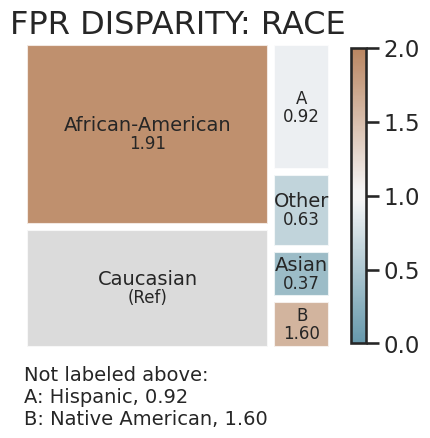

In [ ]:
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='race', significance_alpha=0.05)

As an intermediate result, the aequitas-library works well for calculating key bias and fairness metrics and includes helpful functions for intuitively plotting the results. As this first part of the tutorial was aiming on giving a first glance at the data, it was largely built on the aequitas documentation. In the next part, we are shifting the focus away from bias detection and more towards bias mitigation. The second part introcudes a Neural Network that is trained for predicting recidivism and later tuned in order to find the optimal number of units and dropout rate.

 <a name="Part2"></a>
 # Part 2: Neural Network Classifier for Fair Data Distribution

### Loading the data

Not that in this version of the data, some more variables/alternative labels are included:

* two_year_recid, indicating if the person has recidivated within two years

* target, the binary risk score

* The charge degree of defendants where F: felony and M: misdemeanor

* juv_fel_count, containing the number of juvenile felonies

* juv_misd_count, containing the number of juvenile misdemeanors

* juv_other_count, containing the number of prior juvenile convictions which are not considered felonies or misdemeanors

* priors_count, containing the number of prior crimes committed

In [ ]:
df_compas = pd.read_csv("https://raw.githubusercontent.com/jurjoroa/DeepLearning_bias_NLP/JorgeRoa/data_set.csv")

First, we are writing some functions that are later used for creating the accuracy and loss plots.

In [ ]:
# Metric Plot

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo-',marker=None)
    plt.plot(epochs, val_metrics, 'ro-',marker=None)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

Next, we are defining function that we can use to fit our feed forward neural network. We are using ReLU-activation functions for the first three layers and a sigmoid activation function for the output layer (since we are dealing with a classification problem). Moreover, we are using binary crossentropy as our loss function and Adaptive Moment Estimation for minimizing the loss function. We tried to experiment with number of layers, the activation functions, and the droupout rates, but received quite similar results.

In [ ]:
def nn_classifier(n_features):
    inputs = Input(shape = (n_features,))
    dense1 = Dense(40, activation = 'relu')(inputs)
    dropout1 = Dropout(.4)(dense1)
    dense2 = Dense(40, activation = 'relu')(dropout1)
    dropout2 = Dropout(.3)(dense2)
    dense3 = Dense(32, activation = 'relu')(dropout2)
    dropout3 = Dropout(.3)(dense3)
    outputs = Dense(1, activation = 'sigmoid')(dropout3)
    model = Model(inputs = [inputs], outputs = [outputs])
    opt = Adam(learning_rate=0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

Before fitting our defined model, we need to conduct some more data manipulation steps and define our predictor and target features. First, we one hot encode categorial variables (here: the charge degree). Second, we exclude sex and race from the predictors. We define our target variable to be the binary score whether a defendant committed crime within two years after the first incident. Additionally, the data is normalized using MinMaxScaler().

In [ ]:
# One Hot encoding for categorical variable
charge_degree = pd.get_dummies(df_compas['charge_degree'])

charge_degree.columns = ['charge_degree_' + str(x) for x in charge_degree.columns]
df_compas = pd.concat([df_compas, charge_degree], axis=1)

df_compas.drop(['charge_degree'], axis=1, inplace=True)

X = df_compas.copy()

# Sensible attributes (we want to exclude them from training to avoid "intentional" bias)
Z_race = X.pop('race')
Z_sex = X.pop('sex')
Z_data = {'race': Z_race, 'sex': Z_sex}
Z = pd.concat(Z_data, axis = 1)

# Target: COMPAS risk prediction, 1 = Risk of recidivism, 0 = No risk
y = X.pop('target')

# Actual observed criminal activity reported within 2 years from compas score,
# 1 = the person committed a crime
# 0 = Not a recidivist
y_factual = X.pop('two_year_recid')
X.head()

np.random.seed(7)
X_train, X_test, y_train, y_test, y_factual_train, y_factual_test, Z_train, Z_test = train_test_split(X, y, y_factual, Z, test_size = 0.4,
                                                                    stratify = y, random_state = 7)
# Normalize the data
scaler = MinMaxScaler().fit(X_train)
scale_df = lambda df, scaler: pd.DataFrame(scaler.transform(df), columns = df.columns, index = df.index)
X_train = X_train.pipe(scale_df, scaler)
X_test = X_test.pipe(scale_df, scaler)


Now, we can fit our model! We are training over 50 epochs.

In [ ]:
np.random.seed(7)

clf_1 = nn_classifier(n_features = X_train.shape[1])
history = clf_1.fit(X_train, y_train.values, epochs = 50, verbose = 2,validation_data = (X_test, y_test))

Epoch 1/50
116/116 - 2s - loss: 0.6633 - accuracy: 0.5940 - val_loss: 0.6233 - val_accuracy: 0.6455 - 2s/epoch - 13ms/step
Epoch 2/50
116/116 - 0s - loss: 0.6174 - accuracy: 0.6575 - val_loss: 0.5605 - val_accuracy: 0.7077 - 244ms/epoch - 2ms/step
Epoch 3/50
116/116 - 0s - loss: 0.5886 - accuracy: 0.6943 - val_loss: 0.5413 - val_accuracy: 0.7220 - 230ms/epoch - 2ms/step
Epoch 4/50
116/116 - 0s - loss: 0.5705 - accuracy: 0.7033 - val_loss: 0.5325 - val_accuracy: 0.7285 - 243ms/epoch - 2ms/step
Epoch 5/50
116/116 - 0s - loss: 0.5574 - accuracy: 0.7173 - val_loss: 0.5288 - val_accuracy: 0.7285 - 309ms/epoch - 3ms/step
Epoch 6/50
116/116 - 0s - loss: 0.5570 - accuracy: 0.7087 - val_loss: 0.5325 - val_accuracy: 0.7305 - 307ms/epoch - 3ms/step
Epoch 7/50
116/116 - 0s - loss: 0.5477 - accuracy: 0.7287 - val_loss: 0.5268 - val_accuracy: 0.7313 - 233ms/epoch - 2ms/step
Epoch 8/50
116/116 - 0s - loss: 0.5359 - accuracy: 0.7301 - val_loss: 0.5250 - val_accuracy: 0.7341 - 312ms/epoch - 3ms/step
Ep

From the output, we can already tell that the model improved over epochs, as loss decreased and accuracy increased. Let's use our predefined plot_metric function to view the results:

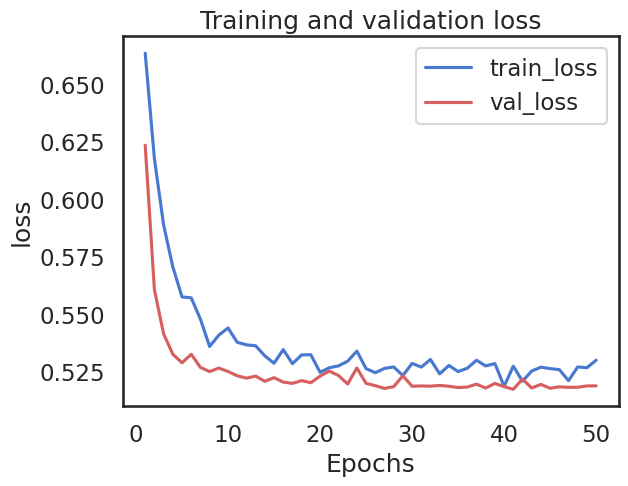

In [ ]:
plot_metric(history, 'loss')

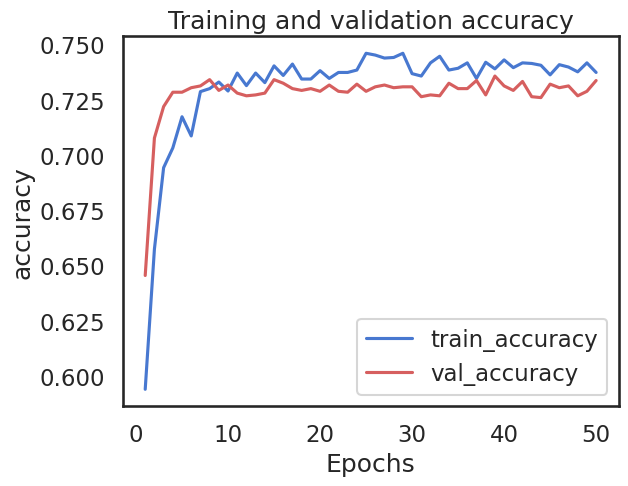

In [ ]:
clf_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
plot_metric(history, 'accuracy')

As we can se, the predicitions quickly approach an accuracy value of around 70 to 75 per cent in both training and validation. After 50 epochs, we are left with accuracy values around 75%. Next, we are adapting our NN-classifier using keras and try to find the optimal hyperparameters and see whether we are able to improve the performance. For that purpose, we are adapting the classifier and experiment with varying values for the number of units in each layer, the dropout rates, and the learning rate.

In [ ]:
def nn_classifier(hp, n_features):
    inputs = Input(shape=(n_features,))
    x = inputs

    # Tuning the number of units in the first dense layer
    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    x = Dense(units=hp_units1, activation='relu')(x)
    hp_dropout1 = hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)
    x = Dropout(rate=hp_dropout1)(x)

    # Tuning the number of units in the second dense layer
    hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    x = Dense(units=hp_units2, activation='relu')(x)
    hp_dropout2 = hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)
    x = Dropout(rate=hp_dropout2)(x)

    # Tuning the number of units in the third dense layer
    hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
    x = Dense(units=hp_units3, activation='relu')(x)
    hp_dropout3 = hp.Float('dropout3', min_value=0.0, max_value=0.5, step=0.1)
    x = Dropout(rate=hp_dropout3)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Tuning the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
def build_model(hp):
    return nn_classifier(hp, n_features=X_train.shape[1])

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    directory='keras_tuner',
    project_name='nn_tuning',
    factor=3,
    hyperband_iterations=2
)


The next chunk takes some time to execute. It used the previously defined tuner for finding the optimal hyperparameter values. We also included early stopping in case that the validation loss is minimized early.

In [ ]:
# Create a callback to stop training early after reaching a certain value for the validation loss
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Execute the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')}, in the second layer is {best_hps.get('units2')}, and in the third layer is {best_hps.get('units3')}.
The optimal dropout rates are {best_hps.get('dropout1')}, {best_hps.get('dropout2')}, and {best_hps.get('dropout3')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")




The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 480, in the second layer is 224, and in the third layer is 320.
The optimal dropout rates are 0.1, 0.1, and 0.4.
The optimal learning rate for the optimizer is 0.001.



As the previous cell's output shows, we received optimal values for the number of units in each layer, the dropout rates, and the Adam opimizer's learning rate. Ultimately, we fit our original model with the optimal hyperparameters. As we can see, the performance stays relatively constant in comparison with our previous model.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
116/116 [==============================] - 2s 10ms/step - loss: 0.5795 - accuracy: 0.6794 - val_loss: 0.5250 - val_accuracy: 0.7256
Epoch 2/50
116/116 [==============================] - 1s 8ms/step - loss: 0.5354 - accuracy: 0.7268 - val_loss: 0.5511 - val_accuracy: 0.7142
Epoch 3/50
116/116 [==============================] - 1s 9ms/step - loss: 0.5304 - accuracy: 0.7268 - val_loss: 0.5211 - val_accuracy: 0.7289
Epoch 4/50
116/116 [==============================] - 1s 9ms/step - loss: 0.5266 - accuracy: 0.7341 - val_loss: 0.5237 - val_accuracy: 0.7305
Epoch 5/50
116/116 [==============================] - 1s 9ms/step - loss: 0.5246 - accuracy: 0.7393 - val_loss: 0.5274 - val_accuracy: 0.7232
Epoch 6/50
116/116 [==============================] - 1s 12ms/step - loss: 0.5265 - accuracy: 0.7355 - val_loss: 0.5295 - val_accuracy: 0.7325
Epoch 7/50
116/116 [==============================] - 1s 12ms/step - loss: 0.5236 - accuracy: 0.7363 - val_loss: 0.5228 - val_accuracy: 0.7276
Epo

 <a name="Part3"></a>
# Part 3: Mitigating bias


After having detected and replicated the bias, we now want to introduce different mitigation strategies - we'll begin with two preprocessing techniques, followed by one prost-processing technique - let's dive right in and see what we can do to get fairer results!

<a name="2datadownload"></a>
## 3.1 Data Download


First step, as usual, is to get our data:

In [ ]:
df_compas_bias = pd.read_csv("https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv")
df_compas_bias.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


<a name="preprocessing"></a>

## 3.1 Data Preprocessing


To further work with the data, we need to clean it up and only keep variables that we want to use for our analysis. The following code leaves us with only the relevant variables: We want to focus our tutorial on racial bias in the COMPAS dataset, thus we only keep the data for "African-American" and "Caucasian" individuals.Further, we map the age variables to numeric values, convert "sex" and "charge_degree" (F: Felony M: Misdemeanor) to binary variables. Last but not least, we drop the "start2 and "end" variables after calculating the duration and adding it as a new variable.

In [ ]:
#Drop columns that we don't need
columns_to_drop = ['id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'age', 'c_jail_in', 'c_jail_out',
                   'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_charge_desc', 'days_b_screening_arrest',
                   'decile_score', 'r_case_number', 'r_days_from_arrest', 'r_offense_date', 'c_days_from_compas',
                   'r_charge_degree', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'priors_count.1', 'violent_recid',
                   'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
                   'type_of_assessment', 'decile_score.1', 'score_text', 'is_recid', 'v_type_of_assessment',
                   'screening_date', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody',
                   'event']

df_compas_bias_w = df_compas_bias.drop(columns=[col for col in columns_to_drop if col in df_compas_bias.columns])

### Keep only white and black individuals
race_map = {'African-American':0, 'Caucasian':1, 'Asian':2, 'Hispanic':3, 'Native American':4, 'Other':5
}

df_compas_bias_w['race'] = df_compas_bias_w['race'].apply(lambda x: race_map[x])
df_compas_bias_w = df_compas_bias_w[(df_compas_bias_w.race == 0.) | (df_compas_bias_w.race == 1.)]

# Map age categories to numeric values
age_map = {'Less than 25': 0, '25 - 45': 1, 'Greater than 45': 2}
df_compas_bias_w['age_cat'] = df_compas_bias_w['age_cat'].map(age_map)

# Convert sex to binary values (Male: 0, Female: 1)
sex_map = {'Male': 0, 'Female': 1}
df_compas_bias_w['sex'] = df_compas_bias_w['sex'].map(sex_map)

# Convert charge degree to binary values (F: 1, M: 0)
charge_degree_map = {'F': 1., 'M': 0.}
df_compas_bias_w['c_charge_degree'] = df_compas_bias_w['c_charge_degree'].map(charge_degree_map)

# Calculate duration in days and drop the original 'end' and 'start' columns
df_compas_bias_w['duration'] = (df_compas_bias_w['end'] - df_compas_bias_w['start'])

#erase start and end
df_compas_bias_w = df_compas_bias_w.drop(columns=['start', 'end'])

As a next step, we want to separate our independent variables (X) from our target variable (Y) , namely "two_year_recid" (a Binary variable indicating whether the defendant is rearrested at within two years). Also, we use the MinMaxScaler from scikit-learn to normalize our features and the fit_transform method to rescale the features. We then have a look at our data, to see, if everything worked out well.

In [ ]:
# Separate features (X) and target variable (y)
X = df_compas_bias_w.drop(columns=['two_year_recid']).values
y = df_compas_bias_w['two_year_recid'].values

In [ ]:
# Rescale the features for better performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Display the first few rows of the modified DataFrame
df_compas_bias_w.head()

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,duration
1,0,1,0,0,0,0,0,1.0,1,150
2,0,0,0,0,0,1,4,1.0,1,63
3,0,0,0,0,1,0,1,1.0,0,1174
6,0,1,1,0,0,0,14,1.0,1,35
8,1,1,1,0,0,0,0,0.0,0,745


<a name="preprocessingmitigation"></a>
## 3.3 Preprocessing Mitigation Techniques




In the next steps, we will predict, whether an individual will recidivate - in other words, we'll precict the target variable, "two_year_recid". To do this, we firstly split our data in a train and a test set. Then, we fit a logistic regression and print the accuracy and some other metrics.

In [ ]:


### Split to train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fit logistic regression and print accuracy
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy =", np.round(acc, 3))

# Precision
precision = precision_score(y_test, y_pred)
print("Precision =", np.round(precision, 3))

# Recall
recall = recall_score(y_test, y_pred)
print("Recall =", np.round(recall, 3))

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score =", np.round(f1, 3))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy = 0.874
Precision = 0.851
Recall = 0.89
F1 Score = 0.87
Confusion Matrix:
 [[838 136]
 [ 96 775]]


## Ratio of African-American to Caucasians on the original data vs. in the precicted outcomes

Let's have look at the distributions in our data, which plays an important role when dealing with fairness measures - as we learned in the first part of this tutorial. The code calculates the ratio of African-Americans in the data - apparently, for every Caucasian prisoner, there are approximately 1.51 African-American prisoners. The model predicts that African-American prisoners are 2.15 times more likely to reoffend than Caucasian prisoners. **This ratio being higher than the actual ratio of African-American to Caucasian prisoners, indicates a potential bias in the predictions towards expecting higher recidivism among African-American individuals.**

In [ ]:
# Identifying African-American and Caucasian individuals in the test set
afr_am = (X_test[:, 2] == 0)
white = (X_test[:, 2] == 1)

# Predictions for African-American and Caucasian individuals
pred_afr_am = y_pred[afr_am]
pred_white = y_pred[white]

# Calculating ratios
afr_am_to_whites_ratio = afr_am.sum() / white.sum()
predicted_reoffense_afr_am_to_whites_ratio = pred_afr_am.sum() / pred_white.sum()

# Printing the ratios
print("Black to white prisoners ratio:", round(afr_am_to_whites_ratio, 2))
print("Predicted reoffense blacks to whites ratio:", round(predicted_reoffense_afr_am_to_whites_ratio, 2))

Black to white prisoners ratio: 1.51
Predicted reoffense blacks to whites ratio: 2.15


### 3.3.1 Using Disparate Impact Repairing (preprocessing)

**Disparate Impact** is a fairness metric used to assess the equality of outcomes between two distinct groups: an unprivileged group and a privileged group. It **measures the ratio of the proportion of individuals receiving favorable outcomes in the unprivileged group to that in the privileged group.**

**Disparate impact remover** is a **preprocessing technique that edits feature values to increase group fairness** while preserving rank-ordering within groups

$$
\frac{\Pr(Y=1|D=\text{unprivileged})}{\Pr(Y=1|D=\text{privileged})}
$$


To use the remover, let's first create two dataframes, one for the privileged group ("Caucasian") and one for the unprivileged group ("African-American"). Next, we want to plot the distribution of outcomes for each of the two groups and visually see this disparity:


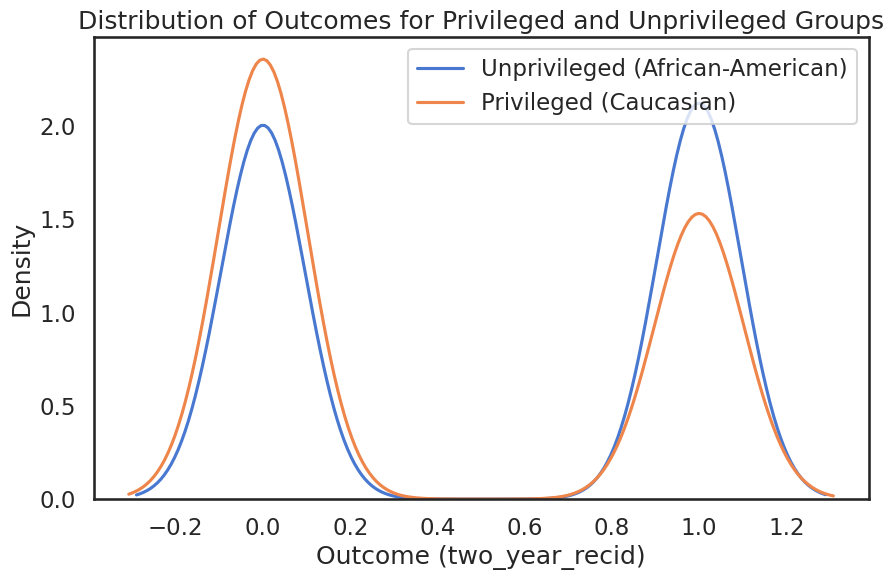

In [ ]:
# Filter the DataFrame into privileged and unprivileged groups
unprivileged = df_compas_bias_w[df_compas_bias_w['race'] == 0]
privileged = df_compas_bias_w[df_compas_bias_w['race'] == 1]

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the distribution for the unprivileged group
sns.distplot(unprivileged['two_year_recid'], hist=False, label='Unprivileged (African-American)')

# Plot the distribution for the privileged group
sns.distplot(privileged['two_year_recid'], hist=False, label='Privileged (Caucasian)')

# Add title and labels
plt.title('Distribution of Outcomes for Privileged and Unprivileged Groups')
plt.xlabel('Outcome (two_year_recid)')
plt.ylabel('Density')

# Show the plot
plt.legend()
plt.show()

Next, we are creating a StandardDataset object using the AIF360 library, which is designed for fairness-aware machine learningand can be then used with various algorithms and metrics provided by AIF360 to assess and mitigate bias in machine learning models.

In [ ]:
protected = 'race' #We chose race as the protected attribute because we are interested in the disparity between African-Americans and Caucasians

# Create a StandardDataset object
df_protected = Dataset(df_compas_bias_w, #The dataset
             label_name='two_year_recid', #The label or target variable that we want to predict
             favorable_classes=[0], #The class we want to consider favorable (0 means no recidivism)
             protected_attribute_names=[protected], #The attribute we want to test for disparity
             privileged_classes=[[1]], categorical_features=[],   # 0 -> Black, 1 -> White to match the order of our dataset
             features_to_keep=['race', 'priors_count', 'duration']) #The features we want to keep in the dataset because they are relevant for our model



In [ ]:

scaler = MinMaxScaler(copy=False) #We create a scaler object

# Splitting the dataset into test and train sets like we did before
test, train = df_protected.split([0.33], seed=42) #We use a seed to make sure we get the same split every time

# Fitting the scaler on the training features and transforming the training features using the same scaler
train.features = scaler.fit_transform(train.features) #We fit the scaler on the training features

# Transforming the test features using the same scaler as the one fitted on the training features
test.features = scaler.transform(test.features) #We transform the test features using the same scaler

# Getting the index of the protected attribute in the feature names list
index = train.feature_names.index(protected) #We get the index of the protected attribute in the feature names list


The **"repair level" parameter quantifies the extent to which you want to adjust the dataset to correct for disparities between privileged and unprivileged groups.**

In the follwoing code chunk, we calculate the disparate impact for both privileged (e.g., Caucasians) and unprivileged (e.g., African-Americans) groups, **storing the results in a list for each repair level.**



In [ ]:
np.random.seed(42)


# Initialize a list to store the disparate impact values
DIs = []

# Iterate over each level of repair
for level in tqdm(np.linspace(0., 1., 11)):
    # Initialize DisparateImpactRemover with the current level
    di = DisparateImpactRemover(repair_level=level) #We initialize the DisparateImpactRemover with the current level
    # Fit and transform the training data
    train_repd = di.fit_transform(train) #We fit and transform the training data
    # Transform the test data (do not fit the test data)
    test_repd = di.fit_transform(test) #We transform the test data (do not fit the test data)

    # Remove the protected attribute before training the model
    X_tr = np.delete(train_repd.features, index, axis=1) #We remove the protected attribute before training the model
    X_te = np.delete(test_repd.features, index, axis=1) #We remove the protected attribute before training the model
    y_tr = train_repd.labels.ravel() #We get the labels for the training set

    # Initialize and fit the logistic regression model
    lmod = LogisticRegression(class_weight='balanced', solver='liblinear') #We initialize and fit the logistic regression model with class_weight='balanced' to account for the imbalance in the dataset
    lmod.fit(X_tr, y_tr) #We fit the model

    # Predict on the test set and copy the results to a new dataset
    test_repd_pred = test_repd.copy() #We predict on the test set and copy the results to a new dataset
    test_repd_pred.labels = lmod.predict(X_te) #We predict on the test set and copy the results to a new dataset

    # Calculate and store the disparate impact
    p = [{protected: 1}] #We calculate and store the disparate impact for the privileged group (in our case Caucasians)
    u = [{protected: 0}] #We calculate and store the disparate impact for the unprivileged group (in our case African-Americans)
    cm = BinaryLabelDatasetMetric(test_repd_pred, privileged_groups=p, unprivileged_groups=u) #We calculate and store the disparate impact for the privileged and unprivileged groups
    DIs.append(cm.disparate_impact()) #We calculate and store the disparate impact for the privileged and unprivileged groups



100%|██████████| 11/11 [00:02<00:00,  4.99it/s]


The graph we'll create next illustrates the efficacy of the Disparate Impact Remover at different repair levels for reducing racial bias within the context of predicting two-year recidivism. As the repair level increases from 0 (no adjustment) to 1 (full adjustment), the disparate impact metric approaches 1.0, which signifies fair treatment between races; each blue dot is a data point that shows how the fairness of the model, as measured by the disparate impact, changes as we apply different levels of bias mitigation.

Initially, **with no repair, the metric is close to 0.8, indicating substantial bias against the unprivileged group (likely African-Americans). With full repair, the bias is reduced, but not entirely eliminated**, suggesting some residual unfairness remains or that the repair cannot fully compensate for the existing disparities within the data. The graph underscores the challenge of achieving complete fairness, as represented by the elusive ideal disparate impact value of 1.0, even as efforts are made to correct for bias in predictive modeling for criminal justice.

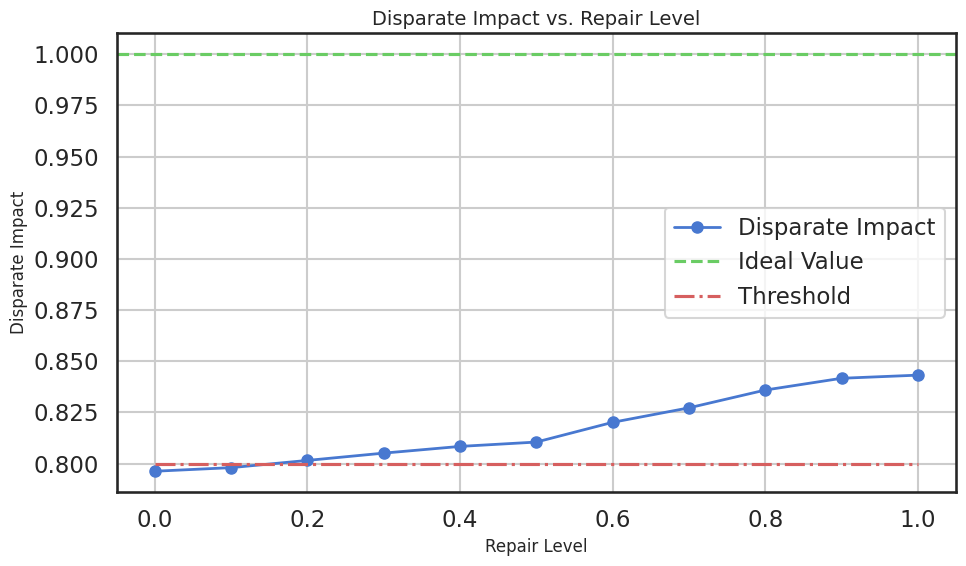

In [ ]:
# Assuming DIs is your list of disparate impact values
repair_levels = np.linspace(0., 1., 11)

# Assuming DIs is defined before this point
DIs = DIs[:11]

plt.figure(figsize=(10, 6))
plt.plot(repair_levels, DIs, marker='o', markersize=8, linewidth=2, label='Disparate Impact')

plt.title('Disparate Impact vs. Repair Level', fontsize=14)
plt.xlabel('Repair Level', fontsize=12)
plt.ylabel('Disparate Impact', fontsize=12)

plt.axhline(y=1.0, color='g', linestyle='--', label='Ideal Value')
plt.plot([0, 1], [0.8, 0.8], 'r', linestyle='-.', label='Threshold')

plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
  # Predict on test using only the features at indices -3 and -1
y_pred = lmod.predict(X_test[:, [-3, -1]])

# Boolean masks for African-American and Caucasian individuals
afr_am_mask = (X_test[:, 2] == 0)
white_mask = (X_test[:, 2] == 1)

# Predictions for African-American and Caucasian individuals
pred_afr_am = y_pred[afr_am_mask]
pred_white = y_pred[white_mask]

# Calculating the ratio of predicted reoffenses
predicted_reoffense_afr_am_to_whites_ratio = pred_afr_am.sum() / pred_white.sum()

# Printing the predicted reoffense ratio
print("Predicted reoffense blacks to whites ratio:", np.round(predicted_reoffense_afr_am_to_whites_ratio, 2))


Predicted reoffense blacks to whites ratio: 2.07


And good news: The Ratio dropped from 2.15 to 2.07! So, reparation has worked, we have a less biased result. But, let's be honest, this is not a huge improvement, there still seems to be a decent amount of bias. So, let's try out some other techniques to improve the fairness of the model even further!

###3.3.2 Reweighting the Data (Preprocessing)


First, let's have a look at the difference in mean outcomes metric of the AIF360 library for unprivileged and privileged groups. A positive value indicates a bias in favor of the privileged group, while a negative value indicates a bias against the unprivileged group. In our case, the latter is the case, with a difference in mean outcomes of -0.126

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric

# Define unprivileged and privileged groups.

privileged_groups = [{'race': 1}]
unprivileged_groups = [{'race': 0}]


# Initialize the metric for the original training dataset
metric_orig_train = BinaryLabelDatasetMetric(train, # train from protected dataset
                                             unprivileged_groups=unprivileged_groups, # Consideres to be at disadvantage (e.g., Blacks)
                                             privileged_groups=privileged_groups) # Considered to be at an advantage (e.g., Caucasians)

# Print the difference in mean outcomes between unprivileged and privileged groups
mean_diff = metric_orig_train.mean_difference() # difference in probabilities of favorable outcomes between the privileged and unprivileged groups.
#A positive value indicates a bias in favor of the privileged group, while a negative value indicates a bias against the unprivileged group.
print("Difference in mean outcomes between blacks and whites = %f" % mean_diff)


Difference in mean outcomes between blacks and whites = -0.125928


Next, we apply a second mitigation strategy by **performing reweighing on the training dataset** to ensure that the total sum of instance weights for the transformed training dataset (transf_train.instance_weights.sum()) is approximately equal to the total sum of instance weights for the original training dataset (train.instance_weights.sum()). The check is done using an absolute difference and comparing it against a small number, 1e-6, to account for any minor floating-point arithmetic discrepancies.

The result "True" indicates that the reweighing algorithm is functioning as intended in this regard: it's **modifying individual instance weights to address disparities without changing the overall weight sum.** This is important to ensure that the dataset's overall statistical properties remain consistent while individual instances are weighted differently to mitigate bias.


In [ ]:

RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(train)
transf_train = RW.transform(train)

In [ ]:
### Testing
np.abs(transf_train.instance_weights.sum()-train.instance_weights.sum())<1e-6

True

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
orig_mean_difference = metric_orig_train.mean_difference()


metric_transf_train = BinaryLabelDatasetMetric(transf_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
transf_mean_difference = metric_transf_train.mean_difference()

print("Difference in mean outcomes between transformed blacks and whites = %f" % metric_transf_train.mean_difference())

Difference in mean outcomes between transformed blacks and whites = -0.000000


The following plot shows that the transformation of the data does not change the overall statistic properties - the distribution of features stays the same after the transformation.

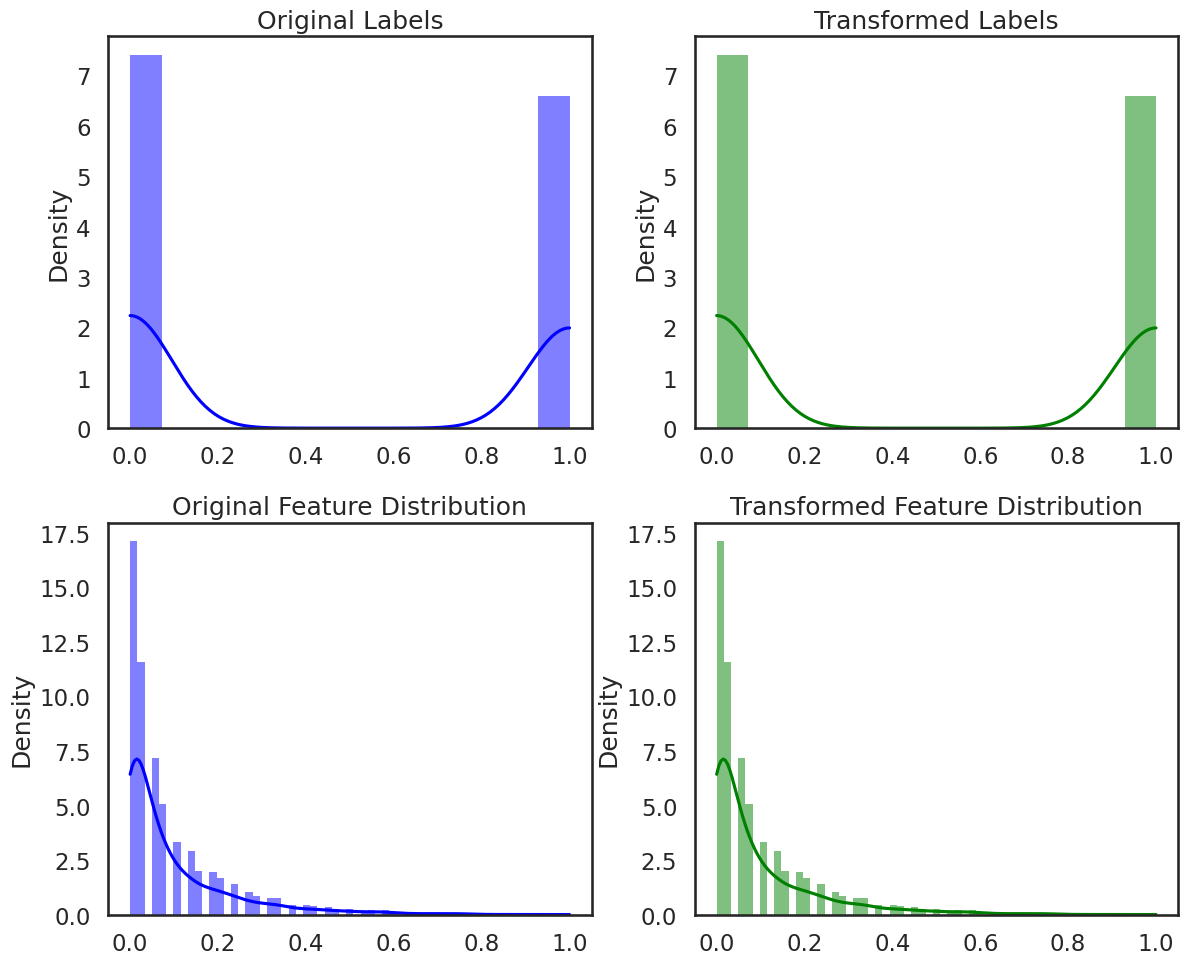

In [ ]:



original_labels = train.labels.ravel()
transformed_labels = transf_train.labels.ravel()

original_feature = train.features[:, train.feature_names.index('priors_count')]
transformed_feature = transf_train.features[:, transf_train.feature_names.index('priors_count')]

# Plotting distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribution of labels
sns.histplot(original_labels, ax=axes[0, 0], color="blue", kde=True, stat="density", linewidth=0)
axes[0, 0].set_title('Original Labels')
sns.histplot(transformed_labels, ax=axes[0, 1], color="green", kde=True, stat="density", linewidth=0)
axes[0, 1].set_title('Transformed Labels')

# Plot distribution of a key feature
sns.histplot(original_feature, ax=axes[1, 0], color="blue", kde=True, stat="density", linewidth=0)
axes[1, 0].set_title('Original Feature Distribution')
sns.histplot(transformed_feature, ax=axes[1, 1], color="green", kde=True, stat="density", linewidth=0)
axes[1, 1].set_title('Transformed Feature Distribution')

plt.tight_layout()
plt.show()

### Train Logistic Regression with reweighed dataset

Now, **let's see, if we can train a fairer model, using this preprocessing technique** of reweighting - promising to make our results less bias. First, we neet to train with the tranformed data and then predict our outcome on the transformed test dataset.

In [ ]:

scale_transf = StandardScaler()
X_reweighed_train = scale_transf.fit_transform(transf_train.features)
y_reweighed_train = transf_train.labels.ravel()

lmod = LogisticRegression()
lmod.fit(X_reweighed_train, y_reweighed_train,
        sample_weight=transf_train.instance_weights)
y_train_pred = lmod.predict(X_reweighed_train)

In [ ]:
transf_test = RW.transform(test)

scale_transf = StandardScaler()
X_reweighed_test = scale_transf.fit_transform(transf_test.features)
y_reweighed_test = transf_test.labels.ravel()

# Predict on test
y_pred = lmod.predict(X_reweighed_test)
X_test

array([[0.        , 0.        , 0.        , ..., 0.02631579, 1.        ,
        0.40499307],
       [0.        , 0.5       , 1.        , ..., 0.        , 1.        ,
        0.82385576],
       [0.        , 1.        , 0.        , ..., 0.26315789, 1.        ,
        0.24479889],
       ...,
       [0.        , 0.5       , 0.        , ..., 0.05263158, 1.        ,
        0.18862691],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.93273232],
       [1.        , 0.5       , 0.        , ..., 0.42105263, 1.        ,
        0.60679612]])

We want to print the calculated ratios, providing insights into the relative proportions of African-American to Caucasian individuals and the predicted reoffense ratios based on the model's predictions on the transformed data, as we did for the original data in the beginning. And wohoo! The **predictions are now closer to the ratio, meaning that our prediction got less biased.** And: we didn't have to sacrifice accuracy for that!

In [ ]:
# Create boolean masks for African-American and Caucasian groups
# Make sure these masks are created from the dataset used for the predictions
afr_am_mask = (transf_test.features[:, 0] == 0)
white_mask = (transf_test.features[:, 0] == 1)

# Apply the masks to the predictions
pred_afr_am = y_pred[afr_am_mask]
pred_white = y_pred[white_mask]

# Calculate the Black to White Prisoners Ratio
# Count of African-American individuals divided by count of Caucasian individuals
ratio_afr_am_white = np.sum(afr_am_mask) / np.sum(white_mask)

# Calculate the Predicted Reoffense Ratio for Blacks to Whites
# Sum of predicted reoffenses for African-Americans divided by sum for Caucasians
ratio_pred_reoffense = np.sum(pred_afr_am == 1) / np.sum(pred_white == 1)

print("Black to white prisoners ratio:", np.round(ratio_afr_am_white, 2))
print("Predicted reoffense blacks to whites ratio:", np.round(ratio_pred_reoffense, 2))


Black to white prisoners ratio: 1.5
Predicted reoffense blacks to whites ratio: 1.85


In [ ]:
y_pred = lmod.predict(X_reweighed_test)

acc = np.sum(y_pred == y_reweighed_test) / len(y_reweighed_test)
print("Accuracy =", np.round(acc, 3))

Accuracy = 0.875


In [ ]:

privileged_groups_new = [{protected: 1}]
unprivileged_groups_new = [{protected: 0}]


cm = BinaryLabelDatasetMetric(transf_test.copy(), #
                              privileged_groups=privileged_groups_new,
                              unprivileged_groups=unprivileged_groups_new)

DIs.append(cm.disparate_impact())

When we apply the reweighted dataset to train a model and subsequently calculate fairness metrics like Disparate Impact (DI), we typically expect the DI values to move towards 1, signaling reduced bias. The marked increase in DI at this full repair level indicates that the algorithm has substantially adjusted the instance weights, aiming to correct for disparities.

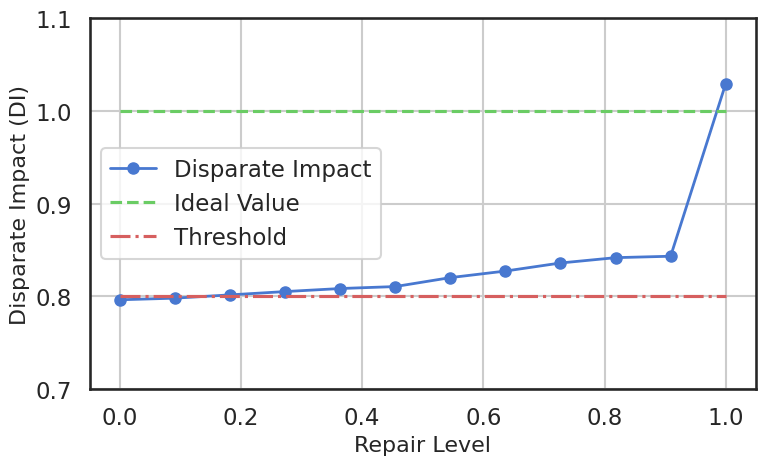

In [ ]:


# Assuming DIs is your list of disparate impact values with the appropriate length
plt.figure(figsize=(8, 5))

# Plot with increased marker size and line width
plt.plot(np.linspace(0, 1, 12), DIs, marker='o', markersize=8, linewidth=2, label='Disparate Impact')

# Green line for the ideal value of DI = 1
plt.plot([0, 1], [1, 1], 'g', linestyle='--', label='Ideal Value')

# Red line for threshold
plt.plot([0, 1], [0.8, 0.8], 'r', linestyle='-.', label='Threshold')

plt.ylim([0.7, 1.1])

# Setting font size for labels and title
plt.ylabel('Disparate Impact (DI)', fontsize=16)
plt.xlabel('Repair Level', fontsize=16)

# Adding grid, legend, and tight layout
plt.grid(True)
plt.legend()
plt.tight_layout()


# Show the plot
plt.show()


<a name="postprocessing"></a>
##Post-processing Mitigation Strategy

### Reject Option Classification

Last but not least we want to present a post-processing strategy to mitigate bias. The goal of Reject Option Classification is to improve the fairness of predictions made by a classifier. Let's give you an overview of this technique:

- **Classifier Prediction**: First, you have a classifier that has been trained on your dataset and makes predictions about new instances.

- **Confidence Interval**: **Reject Option Classification operates on a confidence interval around the decision boundary of the classifier.** This is where the classifier's certainty about its predictions is lower.

- **Protected Attribute**: It uses a protected attribute (in our case: race) to determine where bias might be present in these uncertain predictions.

- **Favorable Outcomes**: For instances within the confidence interval, if they belong to the unprivileged group, the algorithm can change an unfavorable outcome to a favorable one. Conversely, for the privileged group, it can change a favorable outcome to an unfavorable one.

- **Fairness Enhancement**: The idea is to **"reject" the initial decision (hence the name) in favor of one that will lead to a more balanced distribution** of positive outcomes between the privileged and unprivileged groups.

- **Balancing Performance and Fairness**: This method aims to balance the overall performance of the classifier (in terms of accuracy, precision, etc.) with fairness considerations. It seeks to ensure that the positive predictive value (the probability that subjects with a positive screening test truly have the disease) is similar across groups.

In [ ]:
#Identifying the Favorable Outcome Index
pos_ind = np.where(lmod.classes_ == transf_train.favorable_label)[0][0] #We identify the favorable outcome index

#Fit the scaler on the training data and transform the training features
scale_transf = StandardScaler() #We fit the scaler on the training data and transform the training features
X_reweighed_train = scale_transf.fit_transform(transf_train.features) #We fit the scaler on the training data and transform the training features

#Transform the test features using the same scaler
X_reweighed_test = scale_transf.transform(transf_test.features) #We transform the test features using the same scaler

#Copy the datasets
transf_train_post = transf_train.copy() #We copy the datasets
transf_test_post = transf_test.copy() #We copy the datasets

#Predict probabilities and assign scores for the training and test sets
transf_train_post.scores = lmod.predict_proba(X_reweighed_train)[:, pos_ind].reshape(-1, 1) #We predict probabilities and assign scores for the training and test sets
transf_test_post.scores = lmod.predict_proba(X_reweighed_test)[:, pos_ind].reshape(-1, 1) #We predict probabilities and assign scores for the training and test sets


In [ ]:


metric_ub = 0.05 #We set the upper bound for the metric
metric_lb = -0.05 #We set the lower bound for the metric

ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups, #We set the upper bound for the metric
                                 privileged_groups=privileged_groups, #We set the lower bound for the metric
                                 low_class_thresh=0.01, #Range of decision thresholds to consider for potential adjustment.
                                 high_class_thresh=0.99, #Range of decision thresholds to consider for potential adjustment.
                                  num_class_thresh=100, #Number of decision thresholds to be considered within the specified range
                                  num_ROC_margin=50, #Number of margins to be examined around the decision threshold where ROC will adjust the classifier's predictions.
                                  metric_name= 'Statistical parity difference', #Metric used to measure fairness for determining thresholds
                                  metric_ub=metric_ub, metric_lb=metric_lb) #Upper and lower bound for the fairness metric used to determine thresholds

ROC = ROC.fit(transf_test, transf_test_post)

 The technique learns how to adjust the decision thresholds based on the scores and labels in transf_test_post such that the fairness metric (Statistical parity difference in this case) falls between the bounds specified earlier (metric_ub and metric_lb). The dataset transf_test is used as a reference for the original decision making, which transf_test_post presumably improves upon.


In [ ]:
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Optimal classification threshold (with fairness constraints) = 0.8217
Optimal ROC margin = 0.0146


ROC algorithm has identified 0.8217 as the decision threshold that best balances the classifier's performance with the fairness constraints that were set.
Optimal ROC margin = 0.0146. This margin is where the algorithm is most active in adjusting predictions to improve fairness.
if an instance belonging to the unprivileged group has a score slightly below the threshold, it might be pushed above the threshold to receive a favorable outcome. Conversely, an instance from the privileged group with a score just above the threshold might be pulled below it to receive an unfavorable outcome.
the Algorithm has found a way to adjust the classifier's predictions to conform to the fairness constraints without excessively compromising its predictive performance

The purpose of this function is to evaluate the performance of a classification model from both a standard accuracy perspective and a fairness perspective.

In [ ]:


def compute_metrics(dataset_true, dataset_pred,
                    unprivileged_groups, privileged_groups,
                    disp=True):
    """ Compute the key metrics """
    classified_metric_pred = ClassificationMetric(dataset_true, dataset_pred,
                                                  unprivileged_groups=unprivileged_groups,
                                                  privileged_groups=privileged_groups)
    # Initialize an empty OrderedDict
    # Compute all required metrics at once
    metrics = OrderedDict([
        ("Balanced accuracy", 0.5 * (classified_metric_pred.true_positive_rate() +
                                     classified_metric_pred.true_negative_rate())),
        ("Statistical parity difference", classified_metric_pred.statistical_parity_difference()),
        ("Disparate impact", classified_metric_pred.disparate_impact()),
        ("Average odds difference", classified_metric_pred.average_odds_difference()),
        ("Equal opportunity difference", classified_metric_pred.equal_opportunity_difference()),
        ("Theil index", classified_metric_pred.theil_index())
    ])

    if disp:
        # Display metrics in a formatted way
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name} = {metric_value:.4f}")

    return metrics


In [ ]:
# Metrics for the transformed test set
dataset_transf_test_post = ROC.predict(transf_test_post)

In [ ]:
metric_test_aft = compute_metrics(transf_test, dataset_transf_test_post,
                unprivileged_groups, privileged_groups)

Balanced accuracy = 0.8963
Statistical parity difference = -0.0066
Disparate impact = 0.9852
Average odds difference = -0.0173
Equal opportunity difference = -0.0381
Theil index = 0.1148


Using this technique, we get very nice results for both: Our model's performance and its fairness measures.

**Balanced Accuracy (0.8963)** :

Good overall accuracy of the model. Balanced accuracy takes into account both the true positive rate and true negative rate.

**Statistical Parity Difference (-0.0066)**

 It indicates that the probability of a positive outcome (favorable prediction) is nearly equal for both privileged and unprivileged groups

 **Disparate Impact (0.9852)**

A value close to 1 indicates fair treatment between the groups. Specifically, a value of 1 would imply perfect fairness. The model's predictions do not disproportionately favor one group over the other

**Average Odds Difference (-0.0173)**

Equality of odds between unprivileged and privileged groups. A value of 0 would mean perfect equality. The value -0.0173 indicates a small bias against the unprivileged group in terms of false positive and true positive rates, but this bias is relatively minor now.

**Equal Opportunity Difference (-0.0381)**

True positive rates between groups. A value of 0 represents equal opportunity. The value -0.0381 suggests a slight bias against the unprivileged group in terms of having true positives or favorable outcomes.

**Theil Index (0.1148)**

Theil index is a measure of inequality. A value of 0 indicates perfect equality, while higher values show greater inequality. A value of 0.1148 indicates some inequality in the model's predictions, but it's not excessively high


 <a name="results&discussion"></a>

##Results and Discussion

The tutorial introduced how to detect bias and helps the user to replicate a biased CNN in order to understand that bias is something, you always have to keep in mind when training your model.

In the last and most central part of the tutorial we introduced different approaches to mitigate bias. To conclude, we can state that **we successfully debiased the data**, as the last list of performance and fairness metric demonstrates. Beginning with relatively high bias, we applied
- first the **disparate impact remover, showing some, but not an exceptional improvement** in bias metrics.
- We could reach a better result, applying our second preprocessing strategy, namely **reweighting our data** before training our model with it.
- Last but not least, we applied a post processing technique, **Reject Option Classification, that also lead to good results, debiasing our data.**

All of these steps demonstrate that there are **different strategies for each part of our data and model pipeline **to adress bias and find strategies to come to fairer results.




## Limitations

The greatest limitation of this tutorial potentially comes from the chosen data source: The COMPAS data already comes in a quite tidy format and previous analyses already identified the most pressing issues of the data set. When applying the detection and mitigation techniques demonstrated in this tutorial, **students and researcher should be aware that alternative data sets need to be carefully cleaned**before calculating bias metrices and applying mitigation strategies.

Moreover, this tutorial focuses on one specific data input type. When **other data types** are considered (e.g. image, video, or time-series), detection and mitigation strategies potentially need to be adapted.

As introduced in the tutorial memo, **there are numerous distinct types of biases** that can occur in the machine/deep learning pipeline. This tutorial focused on biased data, especially on representation bias. Applied to different data sets, students and researchers should also check for other types of bias (e.g. measurement bias). Additionally, not only the data should be tested for bias, but also implemented models and model evaluating should be critically exmined.

## Next Steps


This tutorial serves as a first introduction to the topic of bias and fairness - we hope that it gave a good overview of the related issues and possible solutions to tackle them. As next steps we propose that users of the tutorial look for **another dataset and try to apply the newly acquired tools** (unfortuately it is not a challenge to find biased datasets on Kaggle or other online platforms).

To dig deeper in the deep learning application it could be interesting to check out the topic of bias and fairness in other data types like images and text data. It would have exceeded the scope of our tutorial but there are very interesting approaches of bias mitigation in Natural Language Processing, for example the approach of text pertubation to train fairer models (https://ai.meta.com/blog/measure-fairness-and-mitigate-ai-bias/). **For policy application, text data is very important  thus we can only recommend the users to get familiar with such techniques.**

To conclude, **we know that we could only show a very small part of bias detection and mitigation strategies** - so we don't expect the users to be experts for this area coming out of this tutorial. **More importantly we hope that we might have shifted the user's view on the importance of bias related issues**. This could be a first step to raise awareness for his crucial part of machine and deep learning - which so far is too often ommitted or neglected.

<a name="references"></a>
# References

All references used:

* COMPAS Analysis using Aequitas
https://dssg.github.io/aequitas/examples/compas_demo.html
* Obermeyer, Z., Powers, B., Vogeli, C., & Mullainathan, S. (2019). Dissecting racial bias in an algorithm used to manage the health of populations. Science, 366(6464), 447-453.
*   Rule A, Birmingham A, Zuniga C, Altintas I, Huang S-C, Knight R, et al. (2019) Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks. PLoS Comput Biol 15(7): e1007007. https://doi.org/10.1371/journal.pcbi.1007007
* Smith, H. (2020). Algorithmic bias: should students pay the price?. AI & society, 35(4), 1077-1078.
* towards datascience, "AI Fairness — Explanation of Disparate Impact Remover". https://towardsdatascience.com/ai-fairness-explanation-of-disparate-impact-remover-ce0da59451f1




## Acknowledgement

